In [2]:
import pandas as pd
import numpy as np


### Importing Data

In [3]:
# Load the data into a pandas dataframe
df = pd.read_csv("./Airlines.csv")

In [4]:
df.describe()

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,DOT_ID_Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,...,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum
count,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000,5.000100e+04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,25000.000000,2004.297814,2.499230,6.493650,15.707946,3.935701,19924.668987,1733.920922,12718.709206,1.271873e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,14434.189742,9.228586,1.120752,3.455136,8.757785,1.989031,366.544796,1671.689653,1529.043164,1.529041e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1987.000000,1.000000,1.000000,1.000000,1.000000,19386.000000,1.000000,10135.000000,1.013501e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,12500.000000,1997.000000,1.000000,3.000000,8.000000,2.000000,19704.000000,523.000000,11292.000000,1.129202e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,25000.000000,2005.000000,3.000000,7.000000,16.000000,4.000000,19805.000000,1182.000000,12892.000000,1.289201e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,37500.000000,2012.000000,3.000000,9.000000,23.000000,6.000000,20355.000000,2236.000000,14057.000000,1.405701e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,50000.000000,2020.000000,4.000000,12.000000,31.000000,7.000000,21171.000000,9572.000000,16440.000000,1.644001e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Subsetting

In [5]:
#MERGING YEAR,MONTH,AND DAYOFMONTH
df["Date"]=pd.to_datetime(df['Year'].astype(str)+'-'+ df['Month'].astype(str)+'-'+ df['DayofMonth'].astype(str), yearfirst=True)
df['Date']

0       1998-01-02
1       2009-05-28
2       2013-06-29
3       2010-08-31
4       2006-01-15
           ...    
49996   1999-10-12
49997   2010-11-01
49998   2006-04-30
49999   2009-07-08
50000   2006-05-17
Name: Date, Length: 50001, dtype: datetime64[ns]

In [6]:
df["AirTime"]=df["AirTime"].fillna(0)

In [7]:
dep_delay = df[["DepDelayMinutes","DepDel15"]]
dep_delay


,DepDelayMinutes,DepDel15
0,19.0,1.0
1,0.0,0.0
2,14.0,0.0
3,0.0,0.0
4,51.0,1.0
...,...,...
49996,0.0,0.0
49997,0.0,0.0
49998,0.0,0.0
49999,0.0,0.0


In [8]:
# arr_delay = df[["ArrDelayMinutes","ArrDel15"]]
# arr_delay

### Cleaning

In [9]:
dep_delay.isnull().sum()

DepDelayMinutes    871
DepDel15           871
dtype: int64

In [10]:
dep_delay = dep_delay.fillna(0)

In [11]:
dep_delay.isnull().sum()

DepDelayMinutes    0
DepDel15           0
dtype: int64

### QUERIES

In [12]:

#1. Airlines that has flown more than 1000 distance
distance = df[df['Distance']>1000]
distance["ArrTime"]



1        1541.0
3        2015.0
12       1511.0
18       2313.0
30       1449.0
          ...  
49965    1908.0
49967     950.0
49979    2251.0
49983      28.0
50000     803.0
Name: ArrTime, Length: 11670, dtype: float64

In [13]:
#2. Airline names that has flown less than 1000 distance
distance = df[df['Distance']<1000]
distance["Reporting_Airline"]

0        NW
2        MQ
4        US
5        DL
6        CO
         ..
49995    EV
49996    WN
49997    OH
49998    UA
49999    F9
Name: Reporting_Airline, Length: 38331, dtype: object

In [14]:

from pandasql import sqldf
# !conda install --yes pandasql # if Library can not work, Run line only
pysqldf=lambda q:sqldf(q,globals())
result_C=pysqldf("Select count(Cancelled),Cancelled from df where Cancelled==1 ")
print ("The Number of cancle flight are : ",result_C)



# df["Cancelled"][df["Cancelled"]==1].sum()

The Number of cancle flight are :     count(Cancelled)  Cancelled
0               878          1


In [15]:
result_NC=pysqldf("Select count(Cancelled),Cancelled from df where Cancelled==0 ")
print ("The Number of flight has done : ",result_NC)

The Number of flight has done :     count(Cancelled)  Cancelled
0             49123          0


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='CancellationCode', ylabel='count'>

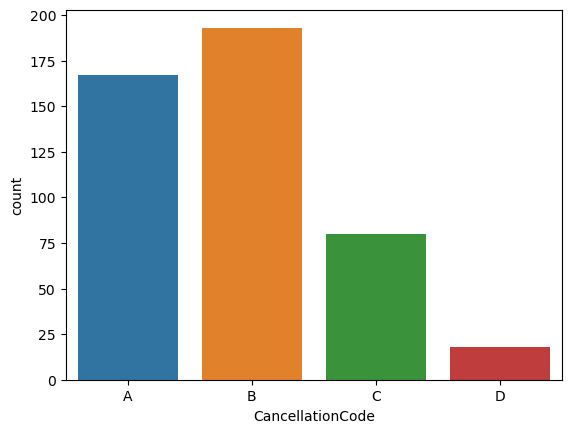

In [17]:
#------->#PLOTTING GRAPH USING SEABORN TO DISPLAY WHY THE FLIGHT WAS CANCELLED<----------

# A - Carrier-Initiated Cancellation: This type of cancellation occurs when the airline cancels
#  the flight for reasons such as maintenance, crew unavailability, or scheduling changes.

# B - Weather-Related Cancellation: This type of cancellation occurs when the flight is canceled 
# due to weather conditions that make flying unsafe. Examples include heavy snow, thunderstorms, 
# and hurricanes.

# C - National Air Traffic Services (ATS) Cancellation: This type of cancellation occurs when the 
# air traffic control authority cancels the flight due to issues such as airspace restrictions, 
# staffing problems, or technical malfunctions.

# D - Security-Related Cancellation: This type of cancellation occurs when the flight is canceled 
# due to security concerns, such as a threat of terrorism or a breach of airport security.

sns.countplot(x='CancellationCode',data=df)

<AxesSubplot:xlabel='Month', ylabel='count'>

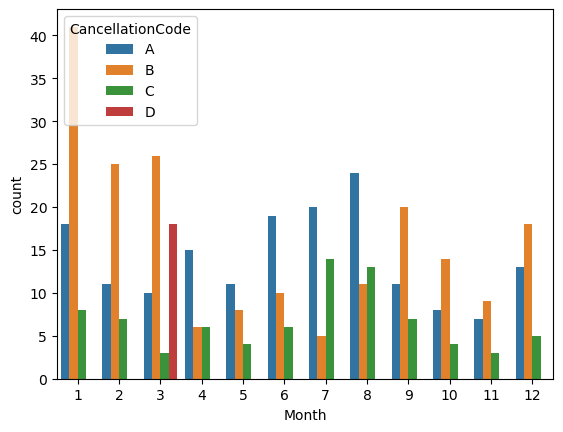

In [18]:
#----->PLOTTING GRAPH USING SEABORN TO DISPLAY IN WHICH MONTH HAS HIGHEST CANCELLATION AND THEIR REASON
sns.countplot(x="Month",hue="CancellationCode",data=df)